In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score

In [2]:
wine = load_wine()

In [17]:
wine.data
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target,random_state=42,test_size=0.3)

In [5]:
rf=RandomForestClassifier(criterion="gini",random_state=42)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

1.0

In [6]:
rf.score(X_test,y_test)

1.0

In [7]:
sc = cross_val_score(rf,wine.data,wine.target,cv=10)

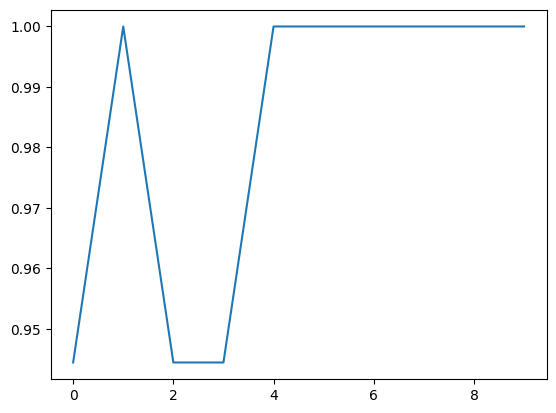

In [8]:
plt.plot(sc)
plt.show()

In [9]:
sc1=[]
for i in range(12):
    rf=RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=42)
    sc = cross_val_score(rf,wine.data,wine.target,cv=10).mean()
    sc1.append(sc)
print(max(sc1),sc1.index(max(sc1)))


0.9552287581699346 9


In [10]:
from scipy.special import comb #导入求组合数的包

以下公式用于计算随机森林的总误差

In [11]:
arr = np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()
arr

0.00036904803455582827

random_state确定随机森林的种子之后，每棵树的种子是不一样的

In [12]:
rf.fit(X_train,y_train)
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014)]

In [13]:
rfl=RandomForestClassifier(random_state=42,oob_score=True)
rfl.fit(wine.data,wine.target) #使用袋外数据来检验模型

RandomForestClassifier(oob_score=True, random_state=42)

In [14]:
rfl.score(wine.data,wine.target)

1.0

In [15]:
rfl.oob_score_

0.9831460674157303